# Logistic Regression

## Importing the libraries

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [48]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/PredictiveModeling/Classification/Examples/SocialNetworkAds_LogisticRegression/Social_Network_Ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [49]:
X = df[['Age', 'EstimatedSalary']].values
y = df[['Purchased']].values

## Plotting data

In [50]:
X_not_purchased = df.loc[df['Purchased']==0, ['Age', 'EstimatedSalary']].values
X_purchased = df.loc[df['Purchased']==1, ['Age', 'EstimatedSalary']].values

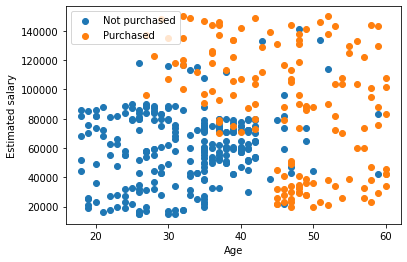

In [51]:
plt.scatter(X_not_purchased[:,0], X_not_purchased[:,1], label='Not purchased')
plt.scatter(X_purchased[:,0], X_purchased[:,1], label='Purchased')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()
plt.show()

(array([28., 37., 46., 35., 77., 65., 35., 31., 18., 28.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <a list of 10 Patch objects>)

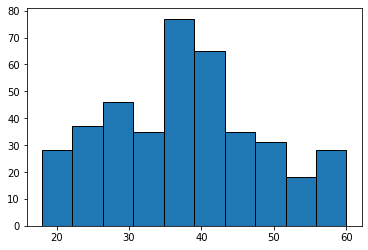

In [52]:
# Age
plt.hist(df['Age'], edgecolor='black')

(array([51., 39., 58., 50., 82., 40., 22., 19., 17., 22.]),
 array([ 15000.,  28500.,  42000.,  55500.,  69000.,  82500.,  96000.,
        109500., 123000., 136500., 150000.]),
 <a list of 10 Patch objects>)

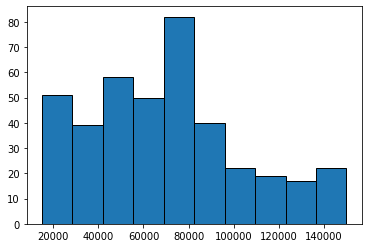

In [53]:
# EstimatedSalary
plt.hist(df['EstimatedSalary'], edgecolor='black')

## Splitting the dataset into the Training set and Test set

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

Best practice is to use only the training set to figure out how to scale / normalize, then blindly apply the same transform to the test set.

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

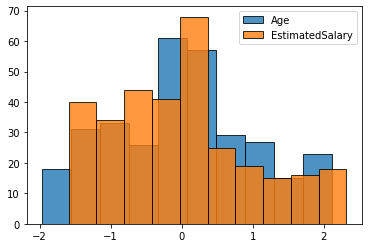

In [56]:
plt.hist(X_train[:,0], label='Age', edgecolor='black', alpha=0.8)
plt.hist(X_train[:,1], label='EstimatedSalary', edgecolor='black', alpha=0.8)
plt.legend()

## Training the Logistic Regression model on the Training set

In [61]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

## Predicting a new result

In [58]:
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Evaluating the model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

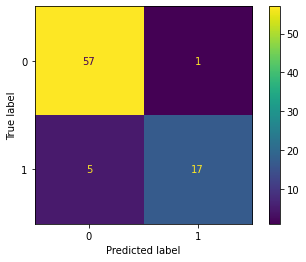

In [66]:
ConfusionMatrixDisplay(cm).plot()